# **OBJECT DETECTION IN IMAGE**

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = "/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [4]:
frozen_model = "/content/frozen_inference_graph.pb"

In [5]:
pip install --upgrade opencv-python

In [6]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [7]:
classLabels=[]

In [8]:
file_name="/content/labels.txt"
with open (file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
len(classLabels)

80

## **Set Model Input Size,Scaling,Mean**

In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127,5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7affd1255c50>

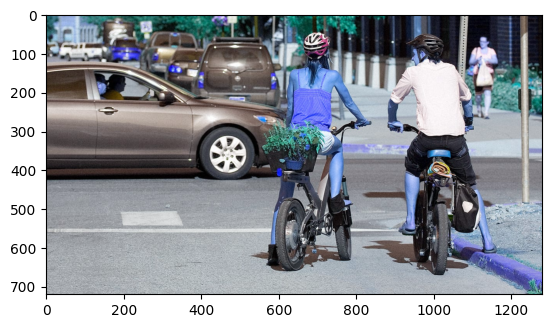

In [12]:
img = cv2.imread('/content/image.jpg')
plt.imshow(img)

In [13]:
ClassIndex,confidece,bbox = model.detect(img,confThreshold=0.5)


In [14]:
print(ClassIndex)

[1 1 3 2 1 3 3 2 2]


In [15]:
font_scale = 3

In [16]:
font= cv2.FONT_HERSHEY_PLAIN

In [17]:
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img, classLabels [ClassInd-1], (boxes[0]+10, boxes [1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

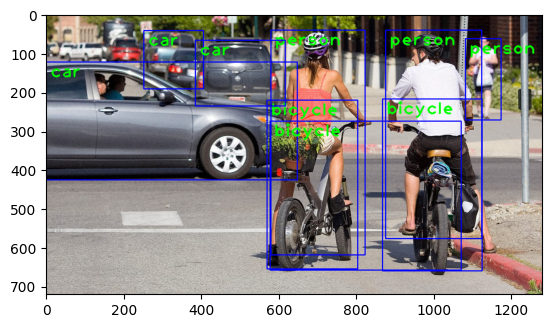

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))